In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_data = pd.read_csv(r"D:\Kaggle\house-prices-advanced-regression-techniques\train.csv", index_col=0)
test_data = pd.read_csv(r"D:\Kaggle\house-prices-advanced-regression-techniques\test.csv", index_col=0)
print(train_data.shape, test_data.shape)

(1460, 80) (1459, 79)


In [4]:
prices = pd.DataFrame({"price": train_data["SalePrice"], "log(price + 1)": np.log1p(train_data["SalePrice"])})


In [5]:
y_train = np.log1p(train_data.pop("SalePrice"))
all_data = pd.concat((train_data, test_data), axis=0)

In [6]:
all_data["MSSubClass"] = all_data["MSSubClass"].astype(str)

In [7]:
all_dummy_data = pd.get_dummies(all_data)

In [8]:
mean_cols = all_dummy_data.mean()
all_dummy_data = all_dummy_data.fillna(mean_cols)

In [9]:
numeric_cols = all_data.columns[all_data.dtypes != "object"]
numeric_col_means = all_dummy_data.loc[:, numeric_cols].mean()
numeric_col_std = all_dummy_data.loc[:, numeric_cols].std()
all_dummy_data.loc[:, numeric_cols] = (all_dummy_data.loc[:, numeric_cols] - numeric_col_means) / numeric_col_std

In [10]:
dummy_train_data = all_dummy_data.loc[train_data.index]
dummy_test_data = all_dummy_data.loc[test_data.index]
print(dummy_train_data.shape, dummy_test_data.shape)

(1460, 303) (1459, 303)


In [11]:
X_train = dummy_train_data.values
X_test = dummy_test_data.values

In [12]:
params = [1, 2, 3, 4, 5, 6]
test_scores = []
for param in params:
   # xgboost是梯度提升树的实现,XGBRegressor默认使用CART回归树,max_depth是回归树的最大深度,我们这里通过网格搜索找出最佳max_depth
   clf = XGBRegressor(max_depth=param)
   test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring="neg_mean_squared_error"))
   test_scores.append(np.mean(test_score))


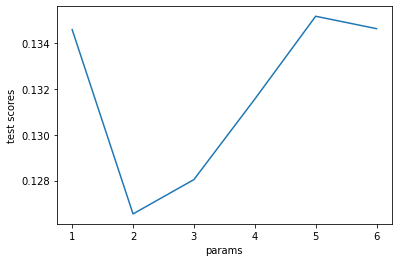

In [13]:
plt.plot(params, test_scores)
plt.xlabel("params")
plt.ylabel("test scores")
plt.show()
plt.close()

In [14]:
xgboost_model = XGBRegressor(max_depth=5)
xgboost_model.fit(X_train, y_train)
y_pred = np.expm1(xgboost_model.predict(X_test))
submission_data = pd.DataFrame(data={"Id": test_data.index, "SalePrice": y_pred})

In [15]:
submission_data

,Id,SalePrice
0,1461,123517.812500
1,1462,160197.203125
2,1463,184810.625000
3,1464,185668.843750
4,1465,180770.500000
...,...,...
1454,2915,75646.882812
1455,2916,91672.375000
1456,2917,171964.296875
1457,2918,108796.570312
